In [48]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import matplotlib as mp
import jupyter
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
mem = Memory("./mycache")

@mem.cache
def get_data(mysvmlightfile):
    data = load_svmlight_file(mysvmlightfile)
    return data[0], data[1]

In [50]:
#读取数据集
x_data,y_data=datasets.load_svmlight_file('australian_scale.txt')

In [51]:
x_data=x_data.todense()

In [52]:
#划分训练集和测试集，20%的数据作为测试集
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_data,y_data,train_size=0.8,test_size=0.2,random_state=0)

In [53]:
#调整数据维度
y_data=np.mat(y_data).T
y_train=np.mat(y_train).T
y_test=np.mat(y_test).T

In [54]:
#参数全零初始化
w=np.zeros(x_train.shape[1])
w=np.mat(w)
w=w.T
b=0

#学习速率
rate=0.0005
#C
c=0.1

In [55]:
#输出数据维度
print(x_data.shape,y_data.shape,w.shape,)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(690, 14) (690, 1) (14, 1)
(552, 14) (552, 1)
(138, 14) (138, 1)


In [56]:
#存储循环次数，L_train,L_validation数组来画图
epoch_array=[]
L_train_array=[]
L_validation_array=[]

In [57]:
#循环次数
epoch=0

选用svm线性模型yi=w.T*xi+b,loss function=1/2 * w.T * w + c*max(0,1-yi*(w.T*xi+b))。
对w求梯度:当1-yi*(w.T*xi+b)>=0时，grad_w = w-c*(yi*xi).T,
当1-yi*(w.T*xi+b)< 0时,grad_w=w.
对b求梯度，当1-yi*(w.T*xi+b)>=0时，grad_b = -c*yi,
当1-yi*(w.T*xi+b)< 0时,grad_b=0.

In [58]:
while epoch<100:
    epoch =epoch + 1
    grad_w =0
    grad_b=0
    
    L_train =0
    L_test =0
    
    #计算grad_W , grad_b
    for i in range(x_train.shape[0]):
        if(1-(y_train[i]*(x_train[i]*w+b))>0):
            grad_w=grad_w+w-c*(y_train[i]*x_train[i]).T
            grad_b=grad_b-c*y_train[i]
        else:
            grad_w=grad_w+w
            
    #更新 w，b
    w=w-rate*grad_w
    b=b-rate*grad_b
    
    #计算L_train,L_validation
    for i in range(x_train.shape[0]):
        if(1-y_train[i]*(x_train[i]*w+b)>0):
            L_train=L_train+1-(y_train[i]*(x_train[i]*w+b))
    for i in range(x_test.shape[0]):
        if(1-y_test[i]*(x_test[i]*w+b)>0):
            L_test=L_test+(1-y_test[i]*(x_test[i]*w))
    L_train=0.5*w.T*w+c*L_train
    L_train=L_train/x_train.shape[0]
    L_test=0.5*w.T*w+c*L_test
    L_test=L_test/x_test.shape[0]
    
    #输出每一次迭代的loss值
    print("epoch:",epoch)
    print("train_error:",L_train)
    print("validation error:",L_test)
    
    #将数据存到数组中
    epoch_array.append(epoch)
    L_train_array.append(np.array(L_train)[0][0])
    L_validation_array.append(np.array(L_test)[0][0])

epoch: 1
train_error: [[ 0.09744205]]
validation error: [[ 0.09751101]]
epoch: 2
train_error: [[ 0.09557932]]
validation error: [[ 0.09571212]]
epoch: 3
train_error: [[ 0.09421955]]
validation error: [[ 0.09441137]]
epoch: 4
train_error: [[ 0.09322374]]
validation error: [[ 0.09347049]]
epoch: 5
train_error: [[ 0.09249132]]
validation error: [[ 0.09278975]]
epoch: 6
train_error: [[ 0.09194955]]
validation error: [[ 0.09229713]]
epoch: 7
train_error: [[ 0.09154578]]
validation error: [[ 0.09194059]]
epoch: 8
train_error: [[ 0.09124191]]
validation error: [[ 0.09168253]]
epoch: 9
train_error: [[ 0.09101035]]
validation error: [[ 0.09149572]]
epoch: 10
train_error: [[ 0.09083115]]
validation error: [[ 0.09136049]]
epoch: 11
train_error: [[ 0.09068985]]
validation error: [[ 0.0912626]]
epoch: 12
train_error: [[ 0.09057599]]
validation error: [[ 0.09119173]]
epoch: 13
train_error: [[ 0.09048199]]
validation error: [[ 0.09114042]]
epoch: 14
train_error: [[ 0.09040238]]
validation error: [[ 0

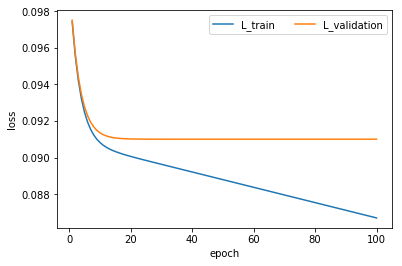

In [59]:
#画图
plt.xlabel('epoch')
plt.ylabel('loss')
line1=plt.plot(epoch_array,L_train_array)
line2=plt.plot(epoch_array,L_validation_array)
label = ["L_train", "L_validation"]
plt.legend(label, loc = 0, ncol = 2)
plt.show()
